In [1]:
import os
from collections  import defaultdict
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def load_from_pickle(file_path):
    """
    Load data from a pickle file.

    Parameters:
    - file_path: The path to the pickle file.

    Returns:
    - loaded_data: The loaded data.
    """
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file)
    # print(f'Data has been loaded from {file_path}')
    return loaded_data

# Size Constraint

In [40]:

gaint_df = []
for problem in [
                'MaxCover',
                # 'MaxCut',
                # 'IM'
              ]:
    root_folder=os.path.join(problem,'data')
    # datasets=['Facebook','DBLP','Skitter','YouTube']
    
    datasets=os.listdir(root_folder)
    print(datasets)

    for dataset in datasets:
        # if dataset in ['Slashdot']:
        

        

        print('*'*20)
        print(dataset)
        dataset_path = os.path.join(root_folder,dataset)
        algorthims = os.listdir(dataset_path)

        # df ={'algorithm':[],'Size of Ground Set':[],'Ratio':[],'Queries':[]}
        df = defaultdict(list)
        # for algorthim in ['Quickfilter','SS','LeNSE','CombHelperTeacher','CombHelperStudent','GNNpruner']:
        for algorthim in ['Quickfilter','SS','CombHelperStudent','GNNpruner']:
          try:
            df_ = load_from_pickle(os.path.join(dataset_path,algorthim))

            # columns =['Ground set(Pruned)','Ratio(%)','Queries(%)']
            df['dataset'].append(dataset)
            df['algorithm'].append(algorthim)
            
            df['Ratio'].append(df_['Ratio(%)'].iloc[0])
            df['Size of Ground Set'].append(df_['Pruned Ground set(%)'].iloc[0])
            # df['Multibudget'].append(df_['Multibudget'].iloc[0])
            
            
            # df['Objective Value(Unpruned)'].append(df_['Objective Value(Unpruned)'].iloc[0])
            # df['Objective Value(Pruned)'].append(df_['Objective Value(Pruned)'].iloc[0])
            # df['Queries'].append(df_['Queries(%)'].iloc[0].zfill(4))
            # df['Queries'].append(df_['Queries(%)'].iloc[0])
          except:
            pass
          # else:
          #    pass
      # print(df)
        df = pd.DataFrame(df)
        # df['Queries'] = df['Queries'].apply(lambda x: f"{x:.4f}")
        df['Size of Ground Set']=df['Size of Ground Set'].round(4)
        # df['Queries'] = df['Queries'].round(4)
        # print(df)
        # print('-'*20)
        gaint_df.append(df)


['Slashdot', 'YouTube', 'Deezer', 'Skitter', 'DBLP', 'Facebook', 'Twitter', 'Wiki']
********************
Slashdot
********************
YouTube
********************
Deezer
********************
Skitter
********************
DBLP
********************
Facebook
********************
Twitter
********************
Wiki


In [41]:
gaint_df = pd.concat(gaint_df)

/tmp/ipykernel_883650/3242178873.py:45: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(nbins=8)


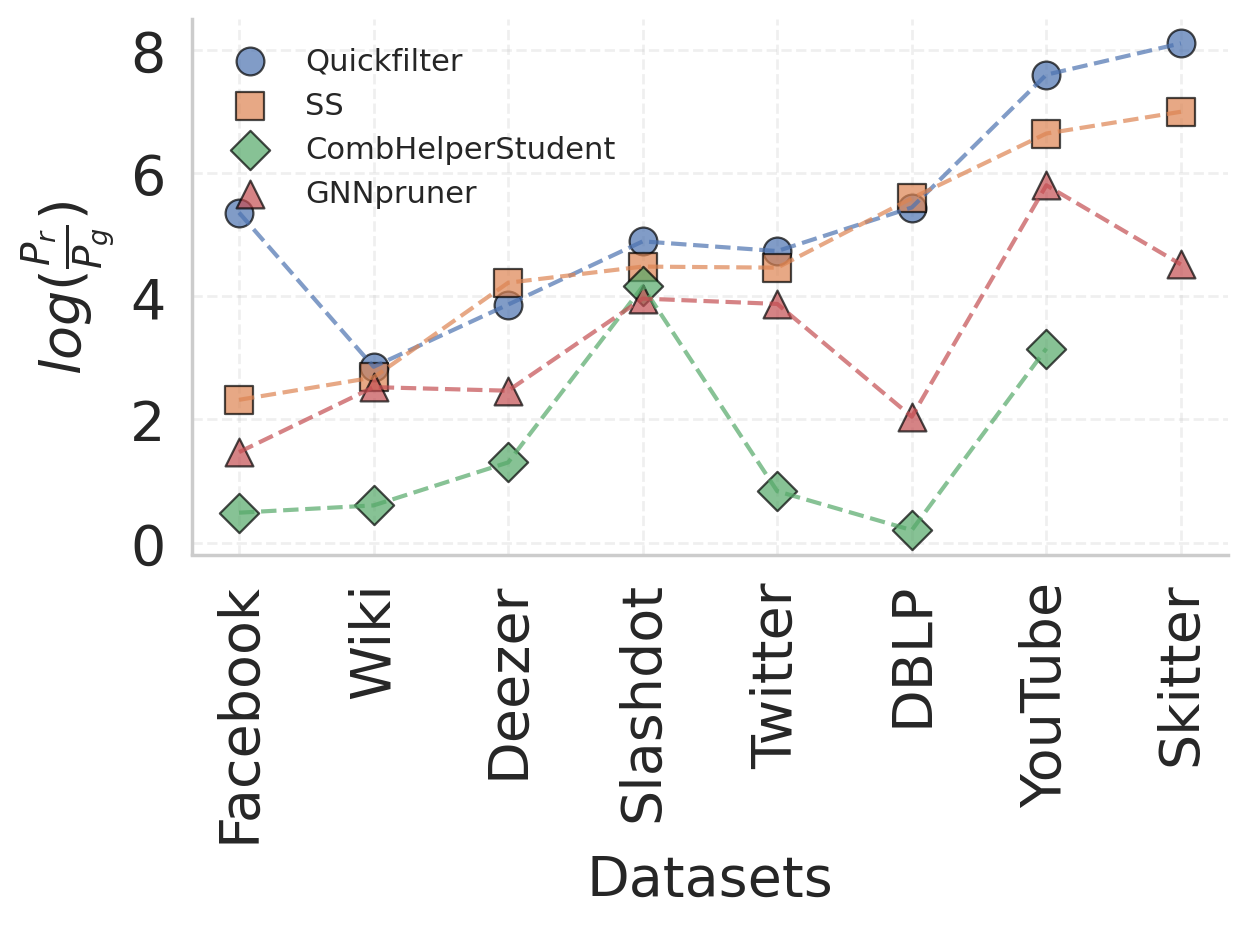

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset (replace this with your actual DataFrame)
# df = gaint_df


# Define the specific order for datasets
dataset_order = ['Facebook', 'Wiki','Deezer','Slashdot','Twitter','DBLP','YouTube','Skitter']
# Convert the dataset column to a categorical type with the specified order
df['dataset'] = pd.Categorical(df['dataset'], categories=dataset_order, ordered=True)
# Assuming df is already defined and contains the necessary columns
df['R/G'] = np.log(df['Ratio'] / df['Size of Ground Set'])


# Prepare the plot
plt.figure(dpi=200)

# Define different markers
markers = ['o', 's', 'D', '^', 'v', 'P', '*', 'X', 'H']

# Loop through each unique algorithm to plot
for index, algorithm in enumerate(df['algorithm'].unique()):
    subset = df[df['algorithm'] == algorithm]
    
    # Scatter plot with different markers
    sns.scatterplot(data=subset, x='dataset', y='R/G', label=algorithm, s=100, 
                    marker=markers[index % len(markers)], edgecolor='black', alpha=0.7)
    
    # Line plot with dotted lines
    sns.lineplot(data=subset, x='dataset', y='R/G', linestyle='--', alpha=0.7)

# Customize plot
fontsize = 20
plt.xlabel('Datasets', fontsize=fontsize)
plt.ylabel(r'$log(\frac{P_r}{P_g})$', fontsize=fontsize)
plt.xticks(fontsize=fontsize,rotation=90)
plt.yticks(fontsize=fontsize )
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(frameon=False)
# plt.grid(True)
plt.grid(alpha=0.3, linestyle='--')
plt.locator_params(nbins=8)

# Show the plot
plt.tight_layout()
sns.despine()
plt.show()


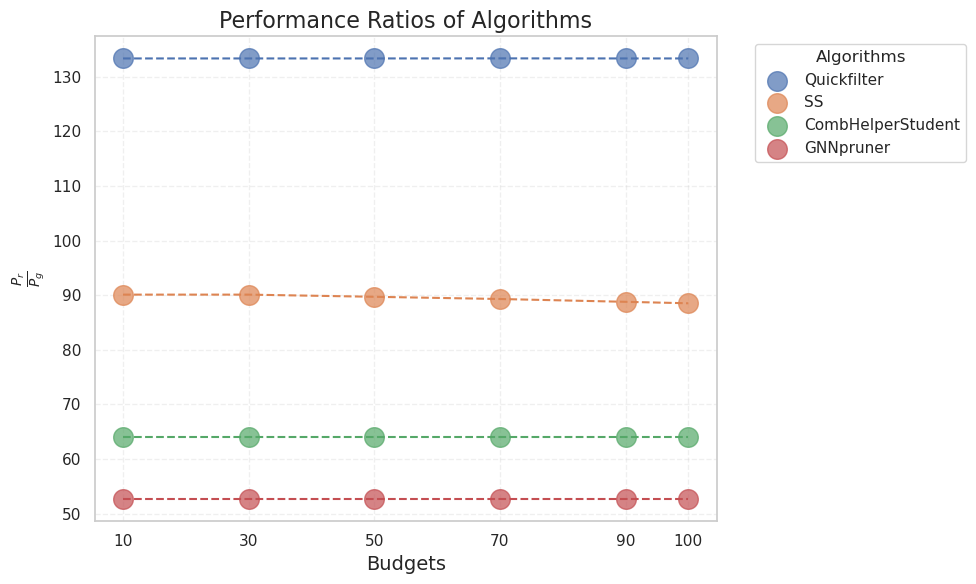

In [14]:
# x_values = [10, 30, 50, 70, 90, 100]

# # Prepare the plot
# plt.figure(figsize=(10, 6))
# sns.set(style='whitegrid')  # Set the style

# # Loop through each algorithm and plot its Ratio against the x_values
# for index, row in df.iterrows():
#     y_values = np.array(row['Multibudget']) / row['Size of Ground Set'] * 100

#     plt.scatter(x_values, y_values, marker='o', s=200, alpha=0.7,label=row['algorithm'])
#     plt.plot(x_values, y_values, linestyle='--')
#     # plt.scatter(df_['Budget'], df_['Ratio Multi'], marker='o', s=200, color='blue', alpha=0.7)
#     # sns.scatterplot(x=x_values, y=y_values, label=row['algorithm'], s=100, edgecolor='black', alpha=0.7)

# # Customize plot
# plt.title('Performance Ratios of Algorithms', fontsize=16)

# plt.xlabel('Budgets', fontsize=14)
# plt.ylabel(r'$\frac{P_r}{P_g}$', fontsize=14) 
# plt.xticks(x_values)  # Set x ticks to be the x_values
# plt.legend(title='Algorithms', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.grid(alpha=0.3, linestyle='--')

# # Show the plot
# plt.tight_layout()
# plt.show()

# Ratio

['Slashdot', 'YouTube', 'Deezer', 'Skitter', 'DBLP', 'Facebook', 'Twitter', 'Wiki']
      algorithm   dataset  QueriesToPrune
0            SS  Slashdot        15266898
1   Quickfilter  Slashdot           77352
2            SS   YouTube       280537609
3   Quickfilter   YouTube         1134892
4            SS    Deezer        10402006
5   Quickfilter    Deezer           54575
6            SS   Skitter       432605754
7   Quickfilter   Skitter         1696417
8            SS      DBLP        71353127
9   Quickfilter      DBLP          317082
10           SS  Facebook          536944
11  Quickfilter  Facebook            4041
12           SS   Twitter        16178116
13  Quickfilter   Twitter           81308
14           SS      Wiki         1050400
15  Quickfilter      Wiki            7117


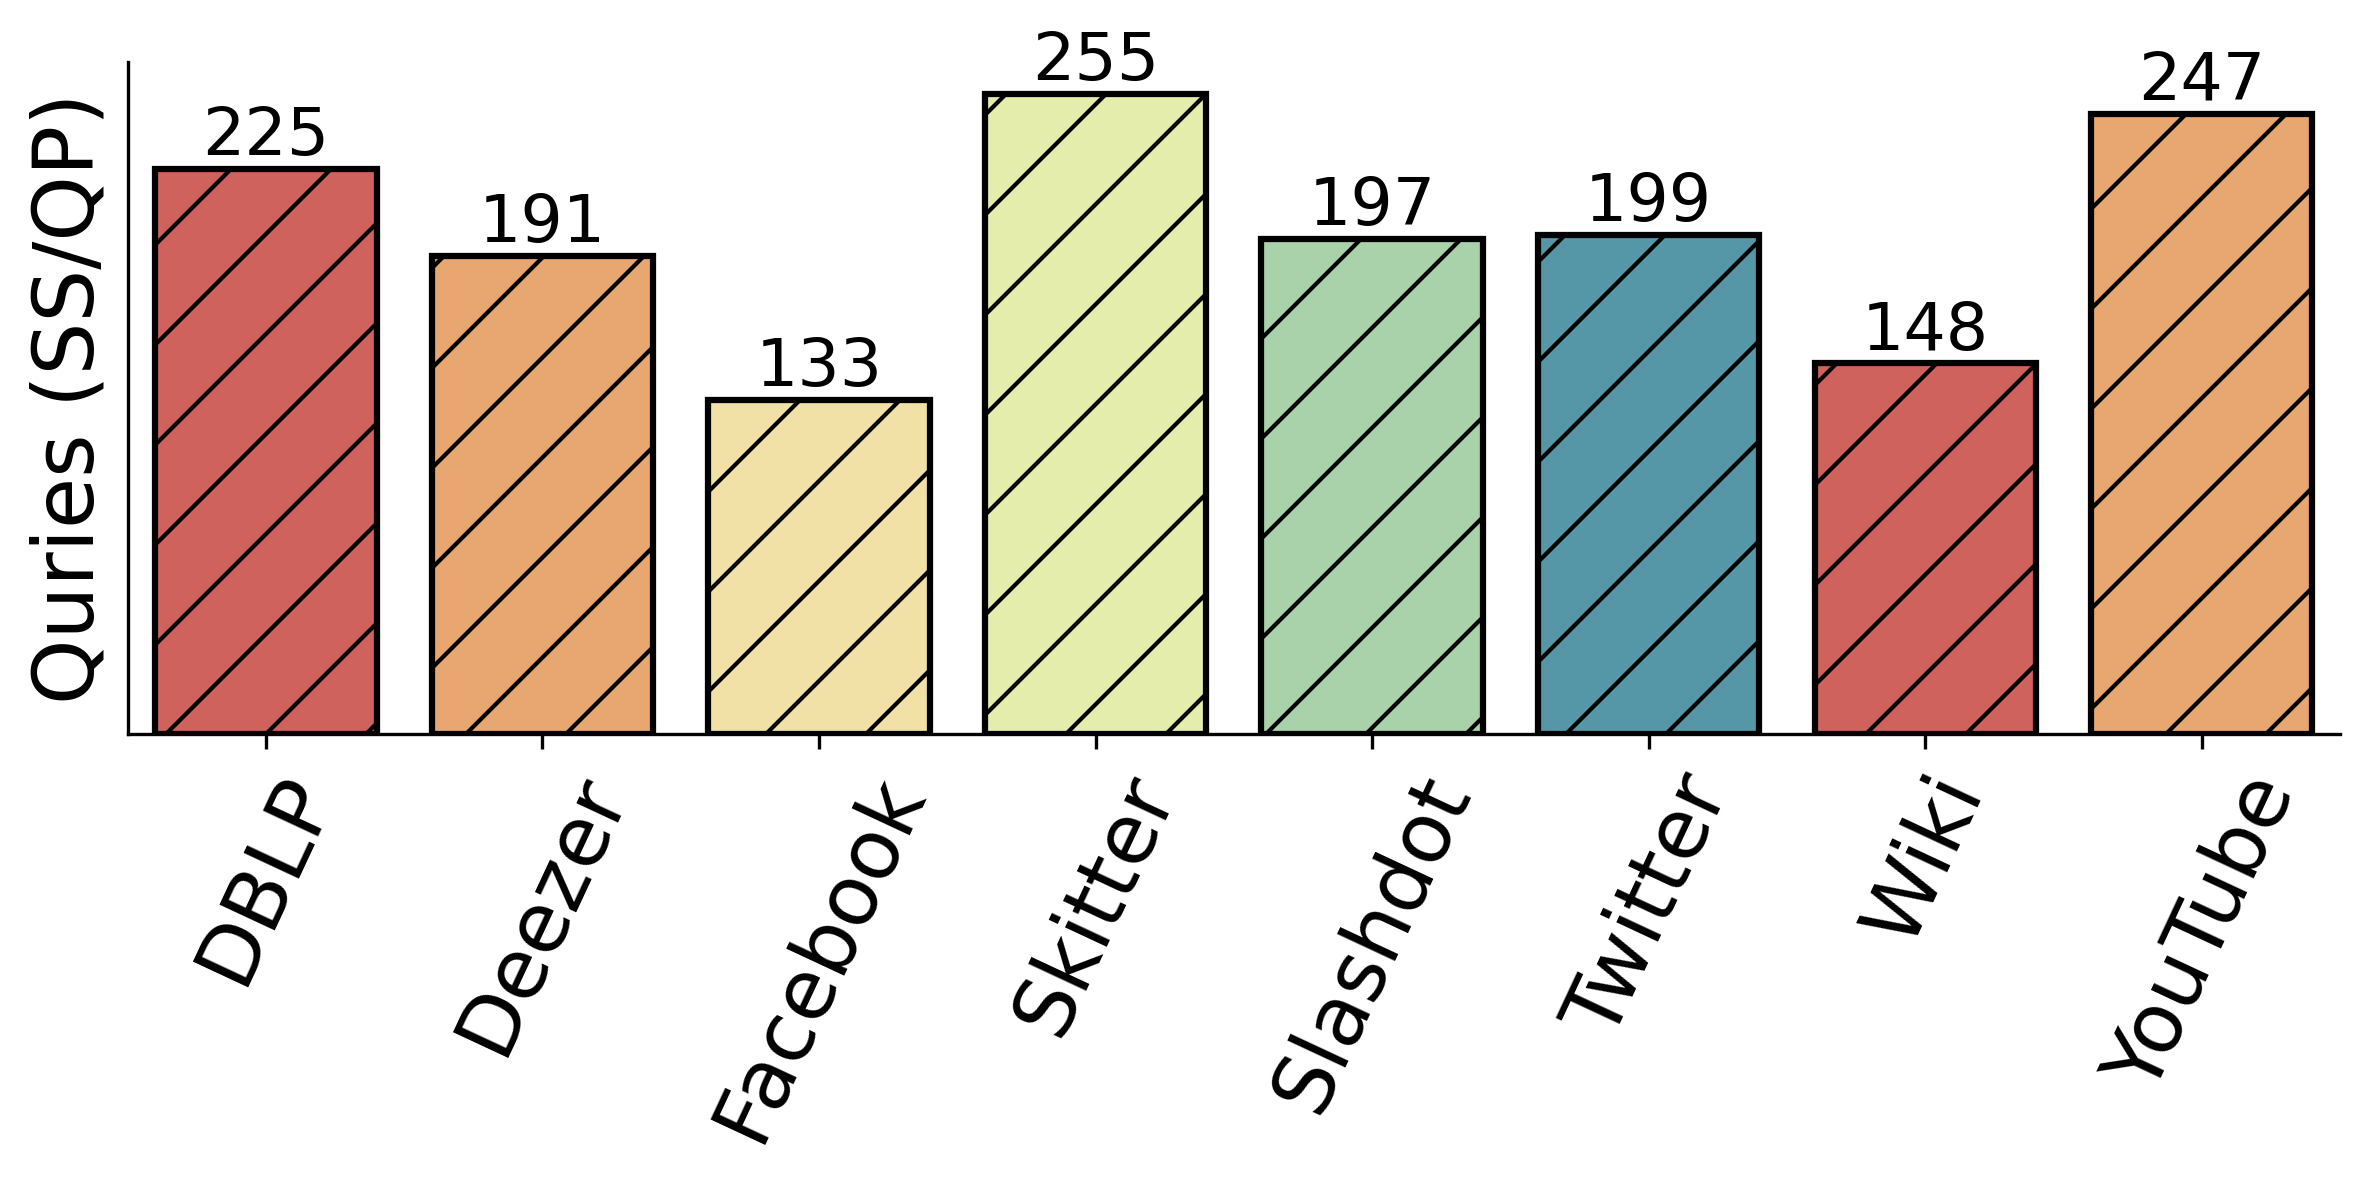

['Slashdot', 'YouTube', 'Deezer', 'Skitter', 'DBLP', 'Facebook', 'Twitter', 'Wiki']
      algorithm   dataset  QueriesToPrune
0            SS  Slashdot        15266898
1   Quickfilter  Slashdot           77352
2            SS   YouTube       280537609
3   Quickfilter   YouTube         1134892
4            SS    Deezer        10402006
5   Quickfilter    Deezer           54575
6            SS   Skitter       432605754
7   Quickfilter   Skitter         1696417
8            SS      DBLP        71353127
9   Quickfilter      DBLP          317082
10           SS  Facebook          536944
11  Quickfilter  Facebook            4041
12           SS   Twitter        16178116
13  Quickfilter   Twitter           81308
14           SS      Wiki         1050400
15  Quickfilter      Wiki            7117


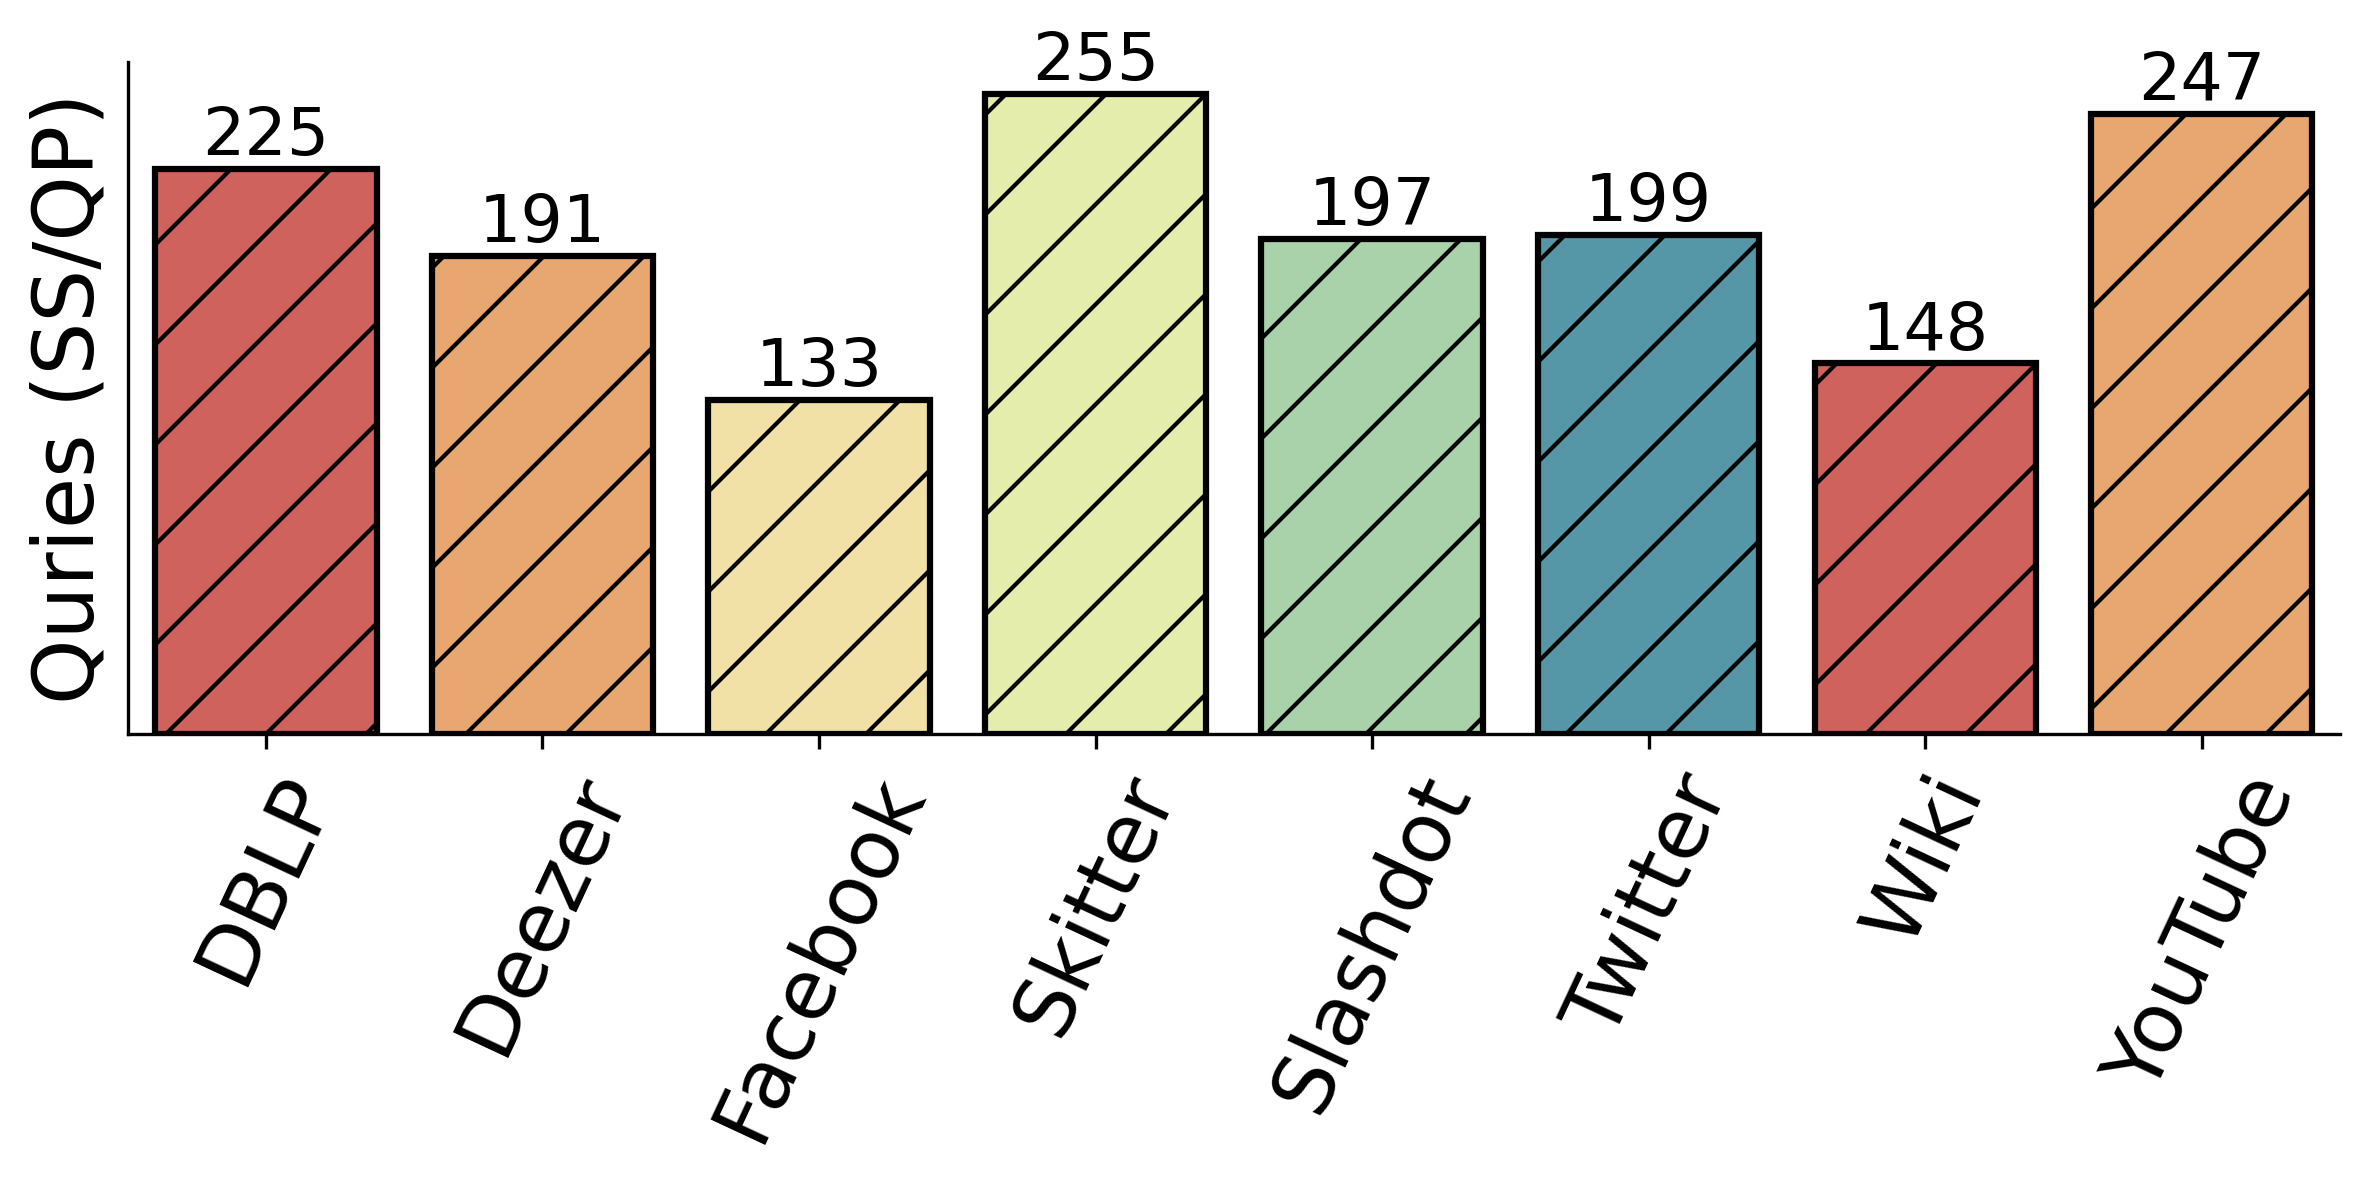

['Slashdot', 'YouTube', 'web-Google', 'Deezer', 'Skitter', 'DBLP', 'Facebook', 'Twitter', 'Wiki']
      algorithm   dataset  QueriesToPrune
0            SS  Slashdot        15344248
1   Quickfilter  Slashdot           77352
2            SS   YouTube       281527389
3   Quickfilter   YouTube         1134892
4            SS    Deezer        10456579
5   Quickfilter    Deezer           54575
6            SS      DBLP        71659446
7   Quickfilter      DBLP          317082
8            SS  Facebook          540983
9   Quickfilter  Facebook            4041
10           SS   Twitter        16259422
11  Quickfilter   Twitter           81308
12           SS      Wiki         1057515
13  Quickfilter      Wiki            7117


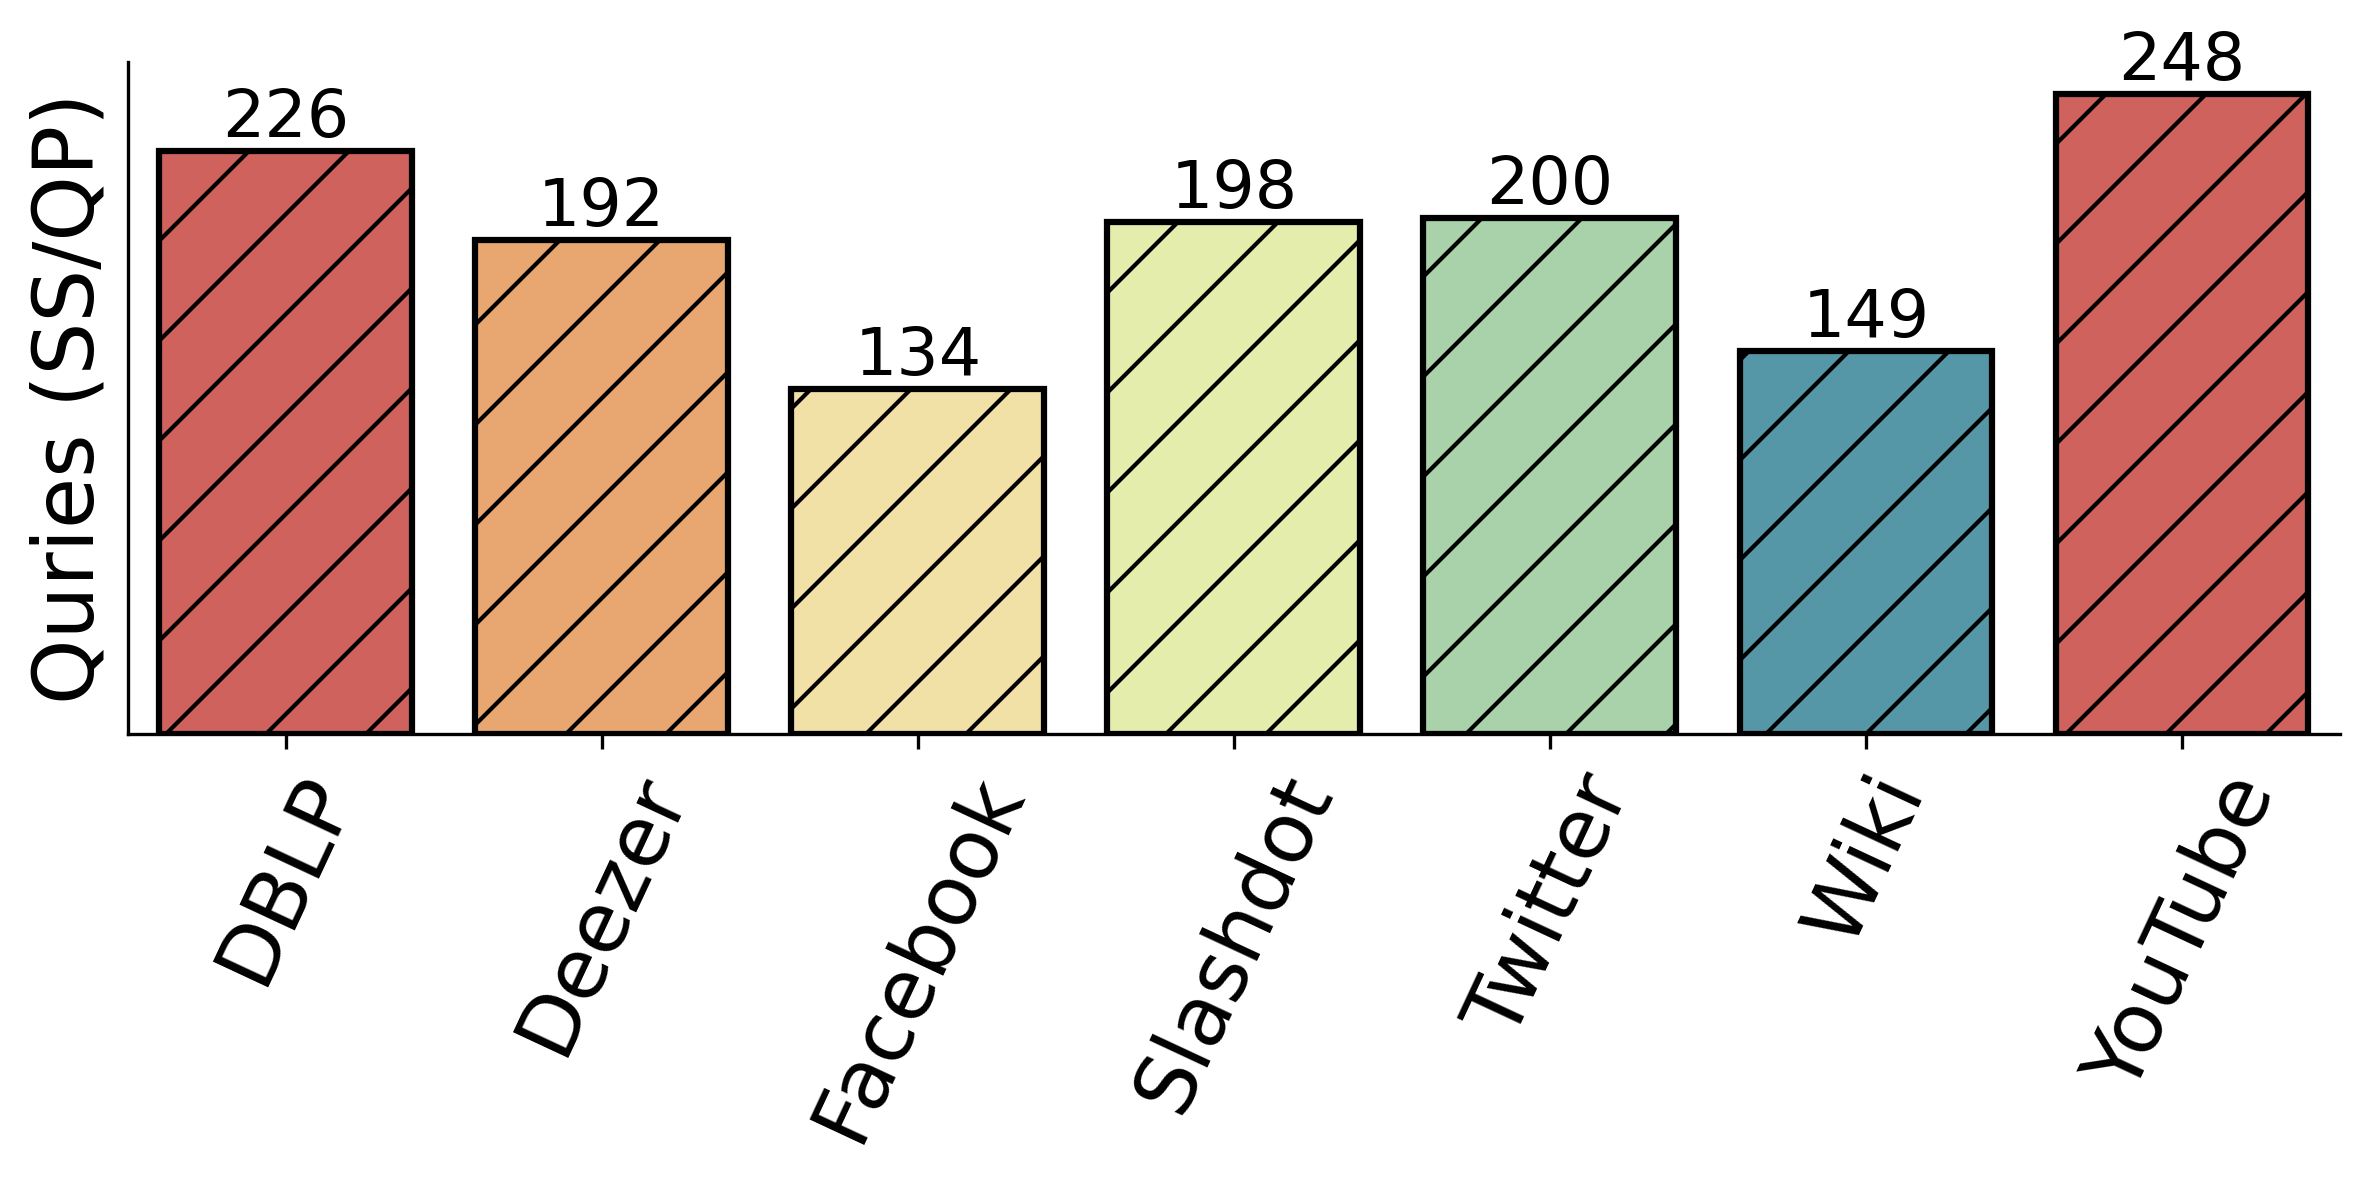

In [76]:
for problem in [
                'MaxCover',
                'MaxCut',
                'IM'
              ]:
    root_folder=os.path.join(problem,'data')
    # datasets=['Facebook','DBLP','Skitter','YouTube']
    
    datasets=os.listdir(root_folder)
    print(datasets)
    df = defaultdict(list)
    for dataset in datasets:
        

        

        # print('*'*20)
        # print(dataset)
        dataset_path = os.path.join(root_folder,dataset)
        algorthims = os.listdir(dataset_path)

        # df ={'algorithm':[],'Size of Ground Set':[],'Ratio':[],'Queries':[]}
        
        # for algorthim in ['Quickfilter','SS','LeNSE','CombHelperTeacher','CombHelperStudent','GNNpruner']:
        for algorthim in ['SS','Quickfilter']:
          try:
            df_ = load_from_pickle(os.path.join(dataset_path,algorthim))
            df['algorithm'].append(algorthim)
            df['dataset'].append(dataset)
            df['QueriesToPrune'].append(df_['QueriesToPrune'].iloc[0])


          except:
            pass
    df = pd.DataFrame(df)
    # df['Queries'] = df['Queries'].apply(lambda x: f"{x:.4f}")
    # df['Size of Ground Set']=df['Size of Ground Set'].round(4) 
    # df['Queries'] = df['Queries'].round(4)
    print(df)
    # print('-'*20)

    # Pivot the dataframe to have 'SS' and 'Quickfilter' as columns
    df_pivot = df.pivot(index='dataset', columns='algorithm', values='QueriesToPrune')

    # Calculate the ratio of Quickfilter/SS
    df_pivot['Ratio'] =  df_pivot['SS']/df_pivot['Quickfilter'] 

    # Reset the index for plotting
    df_pivot.reset_index(inplace=True)
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Assuming df_pivot is already defined
    plt.figure(dpi=300, figsize=(8, 4))
    ax = sns.barplot(x='dataset', y='Ratio', data=df_pivot, palette=sns.color_palette("Spectral"))

    # Set a single hatch pattern (e.g., '/' or 'x') for all bars
    hatch = '/'  # Change this to any desired hatch pattern
    edge_color = 'black'  # Color for the edges

    # Apply the same hatch and edge color to each bar
    for bar in ax.patches:
        bar.set_hatch(hatch)
        bar.set_edgecolor(edge_color)  # Set the edge color
        bar.set_linewidth(1.5)  # Optional: Set the linewidth of the edges

    # Adding the value labels on top of the bars
    for bar in ax.patches:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval,  # Position the text at the height of the bar
            f'{yval:.0f}',  # Format the value to 2 decimal places
            ha='center',  # Center the text horizontally
            va='bottom',  # Position the text just above the bar
            fontsize=16,  # Optional: Font size for the labels
            color='black'  # Optional: Color for the labels
        )

    # Set the labels and title
    plt.xlabel('')
    plt.ylabel('Quries (SS/QP)', fontsize=20)
    plt.xticks(rotation=65, fontsize=20)
    plt.yticks(fontsize=20)
    # Turn off y-axis ticks and labels
    plt.yticks([])

    # Adjust the layout and remove the top and right spines
    plt.tight_layout()
    sns.despine()

    plt.savefig(f'{problem}.pdf', bbox_inches='tight', dpi=300)
    # Show the plot
    plt.show()


In [ ]:
df_pivot

# Multi Budget vs Single Budget

In [ ]:
import os
from collections import defaultdict
for problem in [
                'MaxCover',
                'MaxCut',
                'IM'
              ]:
    image_folder = f'{problem}/figures'
    os.makedirs(image_folder,exist_ok=True)
    root_folder=os.path.join(problem,'data')
    # datasets=['Facebook','DBLP','Skitter','YouTube']
    for folder in [
                    # 'knapsack',
                    'knapsack_multi'
                    ]:
        datasets=os.listdir(root_folder)

        
        # df ={'algorithm':[],'Size of Ground Set':[],'Ratio':[],'Queries':[]}
        df =defaultdict(list)

        for dataset in datasets:

            # print('*'*20)
            # print(dataset)
            dataset_path = os.path.join(root_folder,dataset)
            print(dataset_path)
            try:
                # print(os.path.join(dataset_path,folder,'Quickfilter_degree'))
                # df_ = load_from_pickle(os.path.join(dataset_path,folder,'GNNpruner'))
                df_ = load_from_pickle(os.path.join(dataset_path,folder,'Quickfilter_aistats'))
                
                df_['Budget'] = [10,30,50,70,90,100]
                # print(,folder,df_['Dataset'].iloc[0])
                # df['dataset'].append(dataset)
                # # df['algorithm'].append('QS')
                # # df['Delta'].append(df_['Delta'].iloc[0])
                # df['Size of Ground Set'].append(df_['Pruned Ground set(%)'].iloc[0])
                
                # df['Ratio'].append(df_['Ratio(%)'].iloc[0])
                # # df['Queries'].append(df_['Queries(%)'].iloc[0])
                plt.figure(dpi=200, figsize=(8,6))

                # Scatter for Multi-Budget
                plt.scatter(df_['Budget'], df_['Ratio Multi'], marker='o', s=200, color='blue', alpha=0.7)
                plt.plot(df_['Budget'], df_['Ratio Multi'], linestyle='--', color='blue', 
                        label=f"Multi-Budget $(P_g={df_['Pruned Ground set Multi(%)'].iloc[0]:.2f}\%)$")

                # Scatter for Single-Budget
                plt.scatter(df_['Budget'], df_['Ratio Single'], marker='*', s=300, color='red', alpha=0.7)
                plt.plot(df_['Budget'], df_['Ratio Single'], linestyle='--',color='red', 
                        label=f"Single-Budget $(P_g ={df_['Pruned Ground set Single(%)'].iloc[0]:.2f}\%)$")


                fontsize = 30
                # Adding grid, legend, and style
                plt.grid(alpha=0.3, linestyle='--')
                sns.despine()
                plt.legend(frameon = False,fontsize = fontsize-6)
                plt.title(df_['Dataset'].iloc[0],fontsize = fontsize+4)
                plt.xlabel('Budgets', fontsize=fontsize )
                plt.ylabel('Ratio (%)', fontsize=fontsize)
                plt.xticks(fontsize=fontsize )
                plt.yticks(fontsize=fontsize )
                plt.locator_params(nbins=6)
                
                file_name = os.path.join(image_folder,df_['Dataset'].iloc[0])
                
                # plt.savefig(f'{file_name}', bbox_inches='tight')
                plt.savefig(f'{file_name}.pdf', bbox_inches='tight',dpi=300)

                plt.close()
            except:
                pass
                
        # # print(df)
        # df = pd.DataFrame(df)
        # print(df)
        # # print('-'*20)


# TOP-K

In [74]:
import os
from collections import defaultdict
for problem in [
                'MaxCover',
                # 'MaxCut',
                # 'IM'
              ]:
    image_folder = f'{problem}/figures'
    os.makedirs(image_folder,exist_ok=True)
    root_folder=os.path.join(problem,'data')
    
    for folder in [
                    # 'knapsack',
                    'Knapsack_GNN',
                    # 'knapsack_multi'
                    ]:
        datasets=os.listdir(root_folder)

        
        # df ={'algorithm':[],'Size of Ground Set':[],'Ratio':[],'Queries':[]}
        df =defaultdict(list)

        for dataset in datasets:

            # print('*'*20)
            # print(dataset)
            dataset_path = os.path.join(root_folder,dataset)
            print(dataset_path)
            try:
                # print(os.path.join(dataset_path,folder,'Quickfilter_degree'))
                df_ = load_from_pickle(os.path.join(dataset_path,folder,'GNNpruner_aistats'))
                # df_ = load_from_pickle(os.path.join(dataset_path,folder,'Quickfilter_degree'))
                # df_ = load_from_pickle(os.path.join(dataset_path,folder,'Quickfilter_aistats'))
                print(folder,df_['Dataset'].iloc[-1])
                df['dataset'].append(dataset)
                ## GNN
                df['Ratio(%)'].append(df_['Ratio(%)'].iloc[-1])
                df['Pruned Ground set(%)'].append(df_['Pruned Ground set(%)'].iloc[-1])
                

                # 'Pruned Ground set Single(%)'
                # # df[''].append()
                # df['Ratio Single'].append(df_['Ratio Single'].iloc[-1])
                # df['Pruned Ground set Single(%)'].append(df_['Pruned Ground set Single(%)'].iloc[-1])
                # df['Ratio Single(TOP-K)'].append(df_['Ratio Single(TOP-K)'].iloc[-1])
                
                
            except:
                pass

df = pd.DataFrame(df)
# print(df)

# print(df[df['dataset'].isin(['Facebook','Wiki','Deezer','Slashdot','Twitter','DBLP','YouTube','Skitter'])] )
# List of datasets
datasets = ['Facebook', 'Wiki', 'Deezer', 'Slashdot', 'Twitter', 'DBLP', 'YouTube', 'Skitter']

# Loop through each dataset and print the filtered DataFrame
for dataset in datasets:
    # print(f"\nData for {dataset}:")
    print(df[df['dataset'] == dataset])

MaxCover/data/Slashdot
Knapsack_GNN Slashdot
MaxCover/data/YouTube
Knapsack_GNN YouTube
MaxCover/data/Deezer
Knapsack_GNN Deezer
MaxCover/data/Skitter
Knapsack_GNN Skitter
MaxCover/data/DBLP
Knapsack_GNN DBLP
MaxCover/data/Facebook
Knapsack_GNN Facebook
MaxCover/data/Twitter
Knapsack_GNN Twitter
MaxCover/data/Wiki
Knapsack_GNN Wiki
    dataset  Ratio(%)  Pruned Ground set(%)
5  Facebook     33.03                  0.64
  dataset  Ratio(%)  Pruned Ground set(%)
7    Wiki     100.0                 13.04
  dataset  Ratio(%)  Pruned Ground set(%)
2  Deezer     100.0                  2.75
    dataset  Ratio(%)  Pruned Ground set(%)
0  Slashdot     100.0                 16.75
   dataset  Ratio(%)  Pruned Ground set(%)
6  Twitter     100.0                 52.17
  dataset  Ratio(%)  Pruned Ground set(%)
4    DBLP     100.0                  0.29
   dataset  Ratio(%)  Pruned Ground set(%)
1  YouTube     100.0                 63.74
   dataset  Ratio(%)  Pruned Ground set(%)
3  Skitter     100.0   

In [ ]:
df_

# Split

In [ ]:
Ground_set = {
    'Facebook': 3398,
    'Wiki': 6349,
    'Deezer': 53555,
    'Slashdot':67677,
    'Twitter': 80779,
    'DBLP':314818,
    'YouTube':1094439,
    'Skitter': 1694024

}

data_MVC_Lense = {
    'Facebook': 300,
    'Wiki': 300,
    'Deezer': 500,
    'Slashdot': 500,
    'Twitter': 1000,
    'DBLP': 1000,
    'YouTube': 1250,
    'Skitter': 750
}

data_IM_Lense = {
    'Facebook': 300,
    'Wiki': 300,
    'Deezer': 500,
    'Slashdot': 500,
    'Twitter': 1000,
    'DBLP': 1000,
    'YouTube': 750,
    'Skitter': 750
}


for key in data_MVC_Lense:
    print(key,data_MVC_Lense[key]/Ground_set[key])


for key in data_MVC_Lense:
    print(key,data_MVC_Lense[key]/Ground_set[key])

In [ ]:
for problem in [
                'MaxCover',

              ]:
    root_folder=os.path.join(problem,'data')
    
    
    datasets=os.listdir(root_folder)
    # print(datasets)

    for dataset in datasets:
        
        print('*'*20)
        print(dataset)
        dataset_path = os.path.join(root_folder,dataset)
        algorthims = os.listdir(dataset_path)

        # df ={'algorithm':[],'Size of Ground Set':[],'Ratio':[],'Queries':[]}
        df = defaultdict(list)
        # for algorthim in ['Quickfilter','SS','LeNSE','CombHelperTeacher','CombHelperStudent','GNNpruner']:
        for algorthim in ['Quickfilter','SS','LeNSE','CombHelperStudent','GNNpruner']:
          try:
            df_ = load_from_pickle(os.path.join(dataset_path,algorthim))

            # columns =['Ground set(Pruned)','Ratio(%)','Queries(%)']
            df['algorithm'].append(algorthim)
            df['Size of Ground Set'].append(df_['Pruned Ground set(%)'].iloc[0])
            df['Ratio'].append(df_['Ratio(%)'].iloc[0])
            # df['Objective Value(Unpruned)'].append(df_['Objective Value(Unpruned)'].iloc[0])
            # df['Objective Value(Pruned)'].append(df_['Objective Value(Pruned)'].iloc[0])
            # df['Queries'].append(df_['Queries(%)'].iloc[0].zfill(4))
            # df['Queries'].append(df_['Queries(%)'].iloc[0])
          except:
            pass
      # print(df)
        df = pd.DataFrame(df)
        # df['Queries'] = df['Queries'].apply(lambda x: f"{x:.4f}")
        df['Size of Ground Set']=df['Size of Ground Set'].round(4)
        # df['Queries'] = df['Queries'].round(4)
        print(df)
        print('-'*20)
